In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [104]:
data = pd.read_excel('C:\\Users\singh\\Downloads\\Data_Train.xlsx')

In [105]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [106]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [107]:
data.shape

(10683, 11)

In [110]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [111]:
data['Total_Stops'].replace(to_replace='non-stop',value=0,inplace=True)
data['Total_Stops'].replace(to_replace='2 stops',value=2,inplace=True)
data['Total_Stops'].replace(to_replace='1 stop',value=1,inplace=True)
data['Total_Stops'].replace(to_replace='3 stops',value=3,inplace=True)
data['Total_Stops'].replace(to_replace='4 stops',value=4,inplace=True)
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0.0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0.0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0.0,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0.0,No info,12648


In [117]:
data["Date"] = data['Date_of_Journey'].str.split('/').str[0]
data["Month"] = data['Date_of_Journey'].str.split('/').str[1]
data["Year"] = data['Date_of_Journey'].str.split('/').str[2]

In [118]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0.0,No info,4107,9,04,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0.0,No info,4145,27,04,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0.0,No info,7229,27,04,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0.0,No info,12648,01,03,2019


In [119]:
data.drop("Date_of_Journey", axis=1, inplace=True)

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Source           10683 non-null  object 
 2   Destination      10683 non-null  object 
 3   Route            10682 non-null  object 
 4   Dep_Time         10683 non-null  object 
 5   Arrival_Time     10683 non-null  object 
 6   Duration         10683 non-null  object 
 7   Total_Stops      10682 non-null  float64
 8   Additional_Info  10683 non-null  object 
 9   Price            10683 non-null  int64  
 10  Date             10683 non-null  object 
 11  Month            10683 non-null  object 
 12  Year             10683 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [121]:
data['Date'] = data['Date'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Year'] = data['Year'].astype(int)

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Source           10683 non-null  object 
 2   Destination      10683 non-null  object 
 3   Route            10682 non-null  object 
 4   Dep_Time         10683 non-null  object 
 5   Arrival_Time     10683 non-null  object 
 6   Duration         10683 non-null  object 
 7   Total_Stops      10682 non-null  float64
 8   Additional_Info  10683 non-null  object 
 9   Price            10683 non-null  int64  
 10  Date             10683 non-null  int32  
 11  Month            10683 non-null  int32  
 12  Year             10683 non-null  int32  
dtypes: float64(1), int32(3), int64(1), object(8)
memory usage: 959.9+ KB


In [123]:
data['departure_time'] = data['Dep_Time'].str.split(' ').str[0]
data.drop('Dep_Time',axis=1,inplace=True)

In [124]:
data

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,departure_time
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,0.0,No info,3897,24,3,2019,22:20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2.0,No info,7662,1,5,2019,05:50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2.0,No info,13882,9,6,2019,09:25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1.0,No info,6218,12,5,2019,18:05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1.0,No info,13302,1,3,2019,16:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,0.0,No info,4107,9,4,2019,19:55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,0.0,No info,4145,27,4,2019,20:45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,0.0,No info,7229,27,4,2019,08:20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,0.0,No info,12648,1,3,2019,11:30


In [125]:
data['arrival_time'] = data['Arrival_Time'].str.split(' ').str[0]
data.drop('Arrival_Time',axis=1,inplace=True)

In [126]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,departure_time,arrival_time
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,24,3,2019,22:20,01:10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,1,5,2019,05:50,13:15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,9,6,2019,09:25,04:25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,12,5,2019,18:05,23:30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,1,3,2019,16:50,21:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,0.0,No info,4107,9,4,2019,19:55,22:25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,0.0,No info,4145,27,4,2019,20:45,23:20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,0.0,No info,7229,27,4,2019,08:20,11:20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,0.0,No info,12648,1,3,2019,11:30,14:10


In [127]:
data['Total_Stops'].unique()

array([ 0.,  2.,  1.,  3., nan,  4.])

In [128]:
data['Total_Stops'].replace(to_replace='non-stop',value=0,inplace=True)
data['Total_Stops'].replace(to_replace='2 stops',value=2,inplace=True)
data['Total_Stops'].replace(to_replace='1 stop',value=1,inplace=True)
data['Total_Stops'].replace(to_replace='3 stops',value=3,inplace=True)
data['Total_Stops'].replace(to_replace='4 stops',value=4,inplace=True)

In [129]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,departure_time,arrival_time
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,24,3,2019,22:20,01:10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,1,5,2019,05:50,13:15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,9,6,2019,09:25,04:25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,12,5,2019,18:05,23:30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,1,3,2019,16:50,21:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,0.0,No info,4107,9,4,2019,19:55,22:25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,0.0,No info,4145,27,4,2019,20:45,23:20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,0.0,No info,7229,27,4,2019,08:20,11:20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,0.0,No info,12648,1,3,2019,11:30,14:10


In [130]:
data['Duration_Hour'] = data['Duration'].str.split(' ').str[0]
data['Duration_Minute'] = data['Duration'].str.split(' ').str[1]
data.drop('Duration',axis=1,inplace=True)

In [131]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,departure_time,arrival_time,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897,24,3,2019,22:20,01:10,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662,1,5,2019,05:50,13:15,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882,9,6,2019,09:25,04:25,19h,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218,12,5,2019,18:05,23:30,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302,1,3,2019,16:50,21:35,4h,45m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0.0,No info,4107,9,4,2019,19:55,22:25,2h,30m
10679,Air India,Kolkata,Banglore,CCU → BLR,0.0,No info,4145,27,4,2019,20:45,23:20,2h,35m
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0.0,No info,7229,27,4,2019,08:20,11:20,3h,NaN
10681,Vistara,Banglore,New Delhi,BLR → DEL,0.0,No info,12648,1,3,2019,11:30,14:10,2h,40m


In [132]:
def remove_letter(data):
    
    for i in range(len(data)):
        if "h" in data[i]:
            data[i] = data[i].replace('h','')
        elif 'm' in data[i]:
            data[i]=data[i].replace('m','')
        else:
            pass
        
    return data

In [133]:

data['Duration_Hour'] = remove_letter(data['Duration_Hour'])


C:\Users\singh\AppData\Local\Temp/ipykernel_4008/2787742777.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = data[i].replace('h','')
C:\Users\singh\AppData\Local\Temp/ipykernel_4008/2787742777.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=data[i].replace('m','')


In [134]:
data['Duration_Minute']  =data['Duration_Minute'].fillna('0')  # there was an na value
data['Duration_Minute']= remove_letter(data['Duration_Minute'])

C:\Users\singh\AppData\Local\Temp/ipykernel_4008/2787742777.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=data[i].replace('m','')


In [135]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,departure_time,arrival_time,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897,24,3,2019,22:20,01:10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662,1,5,2019,05:50,13:15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882,9,6,2019,09:25,04:25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218,12,5,2019,18:05,23:30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302,1,3,2019,16:50,21:35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0.0,No info,4107,9,4,2019,19:55,22:25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,0.0,No info,4145,27,4,2019,20:45,23:20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0.0,No info,7229,27,4,2019,08:20,11:20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,0.0,No info,12648,1,3,2019,11:30,14:10,2,40


In [136]:
data['Duration_Hour'] = data['Duration_Hour'].astype(int)
data['Duration_Minute'] = data['Duration_Minute'].astype(int)


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Source           10683 non-null  object 
 2   Destination      10683 non-null  object 
 3   Route            10682 non-null  object 
 4   Total_Stops      10682 non-null  float64
 5   Additional_Info  10683 non-null  object 
 6   Price            10683 non-null  int64  
 7   Date             10683 non-null  int32  
 8   Month            10683 non-null  int32  
 9   Year             10683 non-null  int32  
 10  departure_time   10683 non-null  object 
 11  arrival_time     10683 non-null  object 
 12  Duration_Hour    10683 non-null  int32  
 13  Duration_Minute  10683 non-null  int32  
dtypes: float64(1), int32(5), int64(1), object(7)
memory usage: 959.9+ KB


In [138]:
data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Total_Stops        1
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
departure_time     0
arrival_time       0
Duration_Hour      0
Duration_Minute    0
dtype: int64

In [139]:
data = data.dropna(axis=0)

In [140]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,departure_time,arrival_time,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897,24,3,2019,22:20,01:10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662,1,5,2019,05:50,13:15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882,9,6,2019,09:25,04:25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218,12,5,2019,18:05,23:30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302,1,3,2019,16:50,21:35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0.0,No info,4107,9,4,2019,19:55,22:25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,0.0,No info,4145,27,4,2019,20:45,23:20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0.0,No info,7229,27,4,2019,08:20,11:20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,0.0,No info,12648,1,3,2019,11:30,14:10,2,40


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10682 non-null  object 
 4   Total_Stops      10682 non-null  float64
 5   Additional_Info  10682 non-null  object 
 6   Price            10682 non-null  int64  
 7   Date             10682 non-null  int32  
 8   Month            10682 non-null  int32  
 9   Year             10682 non-null  int32  
 10  departure_time   10682 non-null  object 
 11  arrival_time     10682 non-null  object 
 12  Duration_Hour    10682 non-null  int32  
 13  Duration_Minute  10682 non-null  int32  
dtypes: float64(1), int32(5), int64(1), object(7)
memory usage: 1.0+ MB


In [142]:
data['arrival_time'] =data['arrival_time'].str.split(' ').str[0]

C:\Users\singh\AppData\Local\Temp/ipykernel_4008/3754124795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['arrival_time'] =data['arrival_time'].str.split(' ').str[0]


In [143]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,departure_time,arrival_time,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897,24,3,2019,22:20,01:10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662,1,5,2019,05:50,13:15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882,9,6,2019,09:25,04:25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218,12,5,2019,18:05,23:30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302,1,3,2019,16:50,21:35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0.0,No info,4107,9,4,2019,19:55,22:25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,0.0,No info,4145,27,4,2019,20:45,23:20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0.0,No info,7229,27,4,2019,08:20,11:20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,0.0,No info,12648,1,3,2019,11:30,14:10,2,40


In [144]:
data['Arrival_Hour'] = data['arrival_time'].str.split(':').str[0]
data['Arrival_Minute'] = data['arrival_time'].str.split(':').str[1]

C:\Users\singh\AppData\Local\Temp/ipykernel_4008/3165702418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Arrival_Hour'] = data['arrival_time'].str.split(':').str[0]
C:\Users\singh\AppData\Local\Temp/ipykernel_4008/3165702418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Arrival_Minute'] = data['arrival_time'].str.split(':').str[1]


In [145]:
data.drop('arrival_time',axis=1,inplace=True)

c:\Users\singh\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [146]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,departure_time,Duration_Hour,Duration_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897,24,3,2019,22:20,2,50,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662,1,5,2019,05:50,7,25,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882,9,6,2019,09:25,19,0,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218,12,5,2019,18:05,5,25,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302,1,3,2019,16:50,4,45,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,0.0,No info,4107,9,4,2019,19:55,2,30,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,0.0,No info,4145,27,4,2019,20:45,2,35,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,0.0,No info,7229,27,4,2019,08:20,3,0,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,0.0,No info,12648,1,3,2019,11:30,2,40,14,10


In [147]:
data['Dep_Hour'] = data['departure_time'].str.split(':').str[0]
data['Dep_Minute'] = data['departure_time'].str.split(':').str[1]

C:\Users\singh\AppData\Local\Temp/ipykernel_4008/721643308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dep_Hour'] = data['departure_time'].str.split(':').str[0]
C:\Users\singh\AppData\Local\Temp/ipykernel_4008/721643308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dep_Minute'] = data['departure_time'].str.split(':').str[1]


In [148]:
data['Dep_Hour'] = data['Dep_Hour'].astype(int)
data['Dep_Minute'] = data['Dep_Minute'].astype(int)
data['Arrival_Hour'] = data['Arrival_Hour'].astype(int)
data['Arrival_Minute'] = data['Arrival_Minute'].astype(int)

C:\Users\singh\AppData\Local\Temp/ipykernel_4008/374207286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dep_Hour'] = data['Dep_Hour'].astype(int)
C:\Users\singh\AppData\Local\Temp/ipykernel_4008/374207286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Dep_Minute'] = data['Dep_Minute'].astype(int)
C:\Users\singh\AppData\Local\Temp/ipykernel_4008/374207286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Route            10682 non-null  object 
 4   Total_Stops      10682 non-null  float64
 5   Additional_Info  10682 non-null  object 
 6   Price            10682 non-null  int64  
 7   Date             10682 non-null  int32  
 8   Month            10682 non-null  int32  
 9   Year             10682 non-null  int32  
 10  departure_time   10682 non-null  object 
 11  Duration_Hour    10682 non-null  int32  
 12  Duration_Minute  10682 non-null  int32  
 13  Arrival_Hour     10682 non-null  int32  
 14  Arrival_Minute   10682 non-null  int32  
 15  Dep_Hour         10682 non-null  int32  
 16  Dep_Minute       10682 non-null  int32  
dtypes: float64(1

In [150]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [151]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [152]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [153]:
data.drop('Route',axis=1,inplace=True)

c:\Users\singh\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [154]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [155]:
data = pd.get_dummies(data,columns=['Source','Destination','Airline','Additional_Info'],drop_first=True)
data

,Total_Stops,Price,Date,Month,Year,departure_time,Duration_Hour,Duration_Minute,Arrival_Hour,Arrival_Minute,...,Airline_Vistara Premium economy,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0.0,3897,24,3,2019,22:20,2,50,1,10,...,0,0,0,0,0,0,0,0,1,0
1,2.0,7662,1,5,2019,05:50,7,25,13,15,...,0,0,0,0,0,0,0,0,1,0
2,2.0,13882,9,6,2019,09:25,19,0,4,25,...,0,0,0,0,0,0,0,0,1,0
3,1.0,6218,12,5,2019,18:05,5,25,23,30,...,0,0,0,0,0,0,0,0,1,0
4,1.0,13302,1,3,2019,16:50,4,45,21,35,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,4107,9,4,2019,19:55,2,30,22,25,...,0,0,0,0,0,0,0,0,1,0
10679,0.0,4145,27,4,2019,20:45,2,35,23,20,...,0,0,0,0,0,0,0,0,1,0
10680,0.0,7229,27,4,2019,08:20,3,0,11,20,...,0,0,0,0,0,0,0,0,1,0
10681,0.0,12648,1,3,2019,11:30,2,40,14,10,...,0,0,0,0,0,0,0,0,1,0


In [156]:
data.drop('departure_time',axis=1,inplace=True)

In [162]:
data

,Total_Stops,Price,Date,Month,Year,Duration_Hour,Duration_Minute,Arrival_Hour,Arrival_Minute,Dep_Hour,...,Airline_Vistara Premium economy,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0.0,3897,24,3,2019,2,50,1,10,22,...,0,0,0,0,0,0,0,0,1,0
1,2.0,7662,1,5,2019,7,25,13,15,5,...,0,0,0,0,0,0,0,0,1,0
2,2.0,13882,9,6,2019,19,0,4,25,9,...,0,0,0,0,0,0,0,0,1,0
3,1.0,6218,12,5,2019,5,25,23,30,18,...,0,0,0,0,0,0,0,0,1,0
4,1.0,13302,1,3,2019,4,45,21,35,16,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,4107,9,4,2019,2,30,22,25,19,...,0,0,0,0,0,0,0,0,1,0
10679,0.0,4145,27,4,2019,2,35,23,20,20,...,0,0,0,0,0,0,0,0,1,0
10680,0.0,7229,27,4,2019,3,0,11,20,8,...,0,0,0,0,0,0,0,0,1,0
10681,0.0,12648,1,3,2019,2,40,14,10,11,...,0,0,0,0,0,0,0,0,1,0


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Total_Stops                                   10682 non-null  float64
 1   Price                                         10682 non-null  int64  
 2   Date                                          10682 non-null  int32  
 3   Month                                         10682 non-null  int32  
 4   Year                                          10682 non-null  int32  
 5   Duration_Hour                                 10682 non-null  int32  
 6   Duration_Minute                               10682 non-null  int32  
 7   Arrival_Hour                                  10682 non-null  int32  
 8   Arrival_Minute                                10682 non-null  int32  
 9   Dep_Hour                                      10682 non-null 

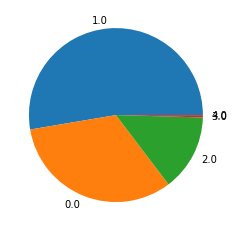

In [161]:
plt.pie(data.Total_Stops.value_counts(), labels = data.Total_Stops.value_counts().index)
plt.show()

In [164]:
corr = data.corr()
corr

,Total_Stops,Price,Date,Month,Year,Duration_Hour,Duration_Minute,Arrival_Hour,Arrival_Minute,Dep_Hour,...,Airline_Vistara Premium economy,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
Total_Stops,1.000000,0.603897,-0.009451,0.054383,NaN,0.740049,-0.136749,0.038140,-0.106940,-0.061476,...,-0.020459,0.016850,0.016850,0.005040,0.044594,0.105734,0.004364,-0.201498,-0.021140,-0.011811
Price,0.603897,1.000000,-0.153774,-0.103643,NaN,0.508902,-0.124899,0.024244,-0.086155,0.006799,...,-0.000454,0.037047,0.036495,0.200307,0.042834,0.039810,-0.003789,-0.207391,0.022247,0.003747
Date,-0.009451,-0.153774,1.000000,-0.038359,NaN,-0.022109,-0.008915,-0.003245,-0.017510,0.002170,...,-0.020115,-0.014275,-0.014275,-0.028554,-0.037779,0.036156,-0.024727,0.033426,-0.036362,-0.014275
Month,0.054383,-0.103643,-0.038359,1.000000,NaN,0.016061,-0.040854,-0.003927,-0.100626,0.039127,...,-0.019797,-0.014199,-0.014199,-0.028401,-0.037576,0.075616,-0.024595,0.013799,-0.065403,-0.014199
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration_Hour,0.740049,0.508902,-0.022109,0.016061,NaN,1.000000,-0.126528,0.055300,-0.074352,0.002903,...,-0.016270,0.004277,0.017947,-0.011382,0.016487,0.192836,-0.012324,-0.172009,-0.113025,-0.009393
Duration_Minute,-0.136749,-0.124899,-0.008915,-0.040854,NaN,-0.126528,1.000000,-0.118315,0.151571,-0.023723,...,0.004953,0.003811,0.006666,0.010478,-0.015820,-0.052332,0.011546,0.034534,0.035159,0.009521
Arrival_Hour,0.038140,0.024244,-0.003245,-0.003927,NaN,0.055300,-0.118315,1.000000,-0.154363,0.005180,...,0.000776,0.013614,-0.006135,-0.003102,0.021630,-0.016821,0.008921,-0.087730,0.050682,-0.016010
Arrival_Minute,-0.106940,-0.086155,-0.017510,-0.100626,NaN,-0.074352,0.151571,-0.154363,1.000000,0.067911,...,0.000314,0.000181,0.000181,-0.001103,0.001588,-0.045619,0.003699,-0.002695,0.043024,-0.008612
Dep_Hour,-0.061476,0.006799,0.002170,0.039127,NaN,0.002903,-0.023723,0.005180,0.067911,1.000000,...,-0.003375,-0.007559,-0.010926,-0.021854,-0.011733,0.057594,-0.000460,-0.010234,-0.048484,0.017689


<AxesSubplot:>

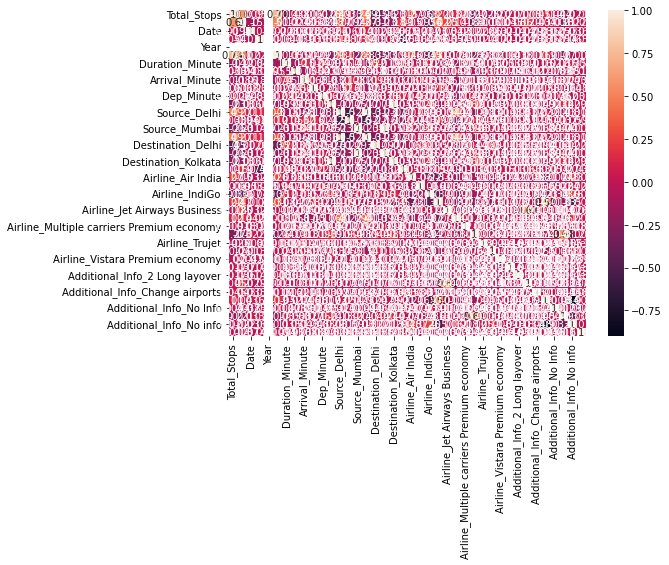

In [166]:
plt.figure(figsize=(8,6))
sb.heatmap(corr, annot = True)